In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploads = files.upload()

Saving gld_price_data.csv to gld_price_data.csv


In [3]:
gold_data=pd.read_csv('gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#Correlation
1.Positive Correlation
2.Negative Correlation

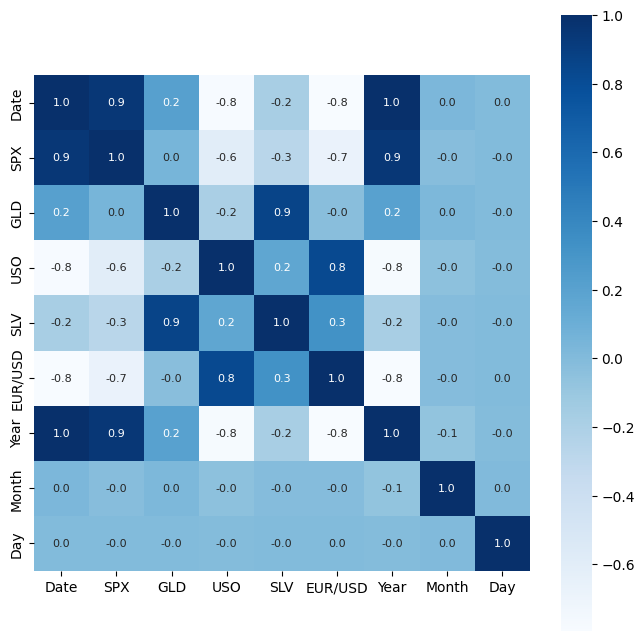

In [9]:
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

# Now calculate the correlation matrix excluding the original 'Date' column
correlation = gold_data.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()


In [10]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Day       -0.000198
Name: GLD, dtype: float64


<Axes: title={'center': 'Distribution of GLD Price'}, xlabel='GLD', ylabel='Density'>

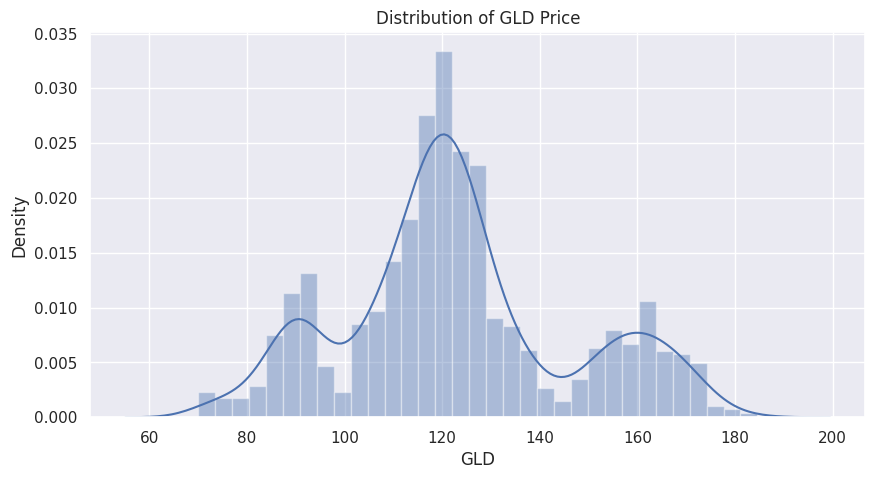

In [11]:
# checking the distibution of the GLD price
sns.set()
plt.figure(figsize=(10,5))
plt.title('Distribution of GLD Price')
sns.distplot(gold_data['GLD'])

Splittig the Features and Target

In [12]:
x = gold_data.drop(['Date','GLD','Year','Month','Day'],axis=1)
y = gold_data['GLD']

In [13]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
# Model training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)


In [15]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
test_data_prediction = regressor.predict(x_test)
test_data_prediction

array([168.74209976,  82.10019994, 115.74950036, 127.80590045,
       120.79670127, 154.63229778, 150.5926989 , 125.84939996,
       117.31679884, 126.15730043, 116.65390143, 171.52630067,
       141.33079812, 167.99239848, 115.05440004, 117.89020034,
       137.94920317, 169.82090109, 159.36160286, 159.55499942,
       155.12989999, 125.06600005, 175.27839977, 156.78430376,
       125.25280037,  93.74609971,  77.65730019, 120.68980025,
       119.06579933, 167.437999  ,  88.2998001 , 125.07749985,
        91.06540039, 117.86629973, 121.1141991 , 136.34710085,
       115.4411008 , 115.11800093, 147.45189974, 107.39480094,
       104.58360264,  87.21399796, 126.55320038, 117.89539977,
       153.95229906, 119.46090039, 108.3075002 , 108.02419802,
        93.30520042, 127.19509759,  75.14720021, 113.65759928,
       121.47100017, 111.170399  , 118.8602987 , 120.72069952,
       158.93489922, 168.32680132, 147.08229671,  85.7369986 ,
        94.30850011,  86.81339879,  90.61180021, 118.88

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
error_score = mean_squared_error(y_test, test_data_prediction)
print(error_score)

5.685206225822505


In [19]:
error_score = r2_score(y_test, test_data_prediction)
print(error_score)

0.9892212033729157


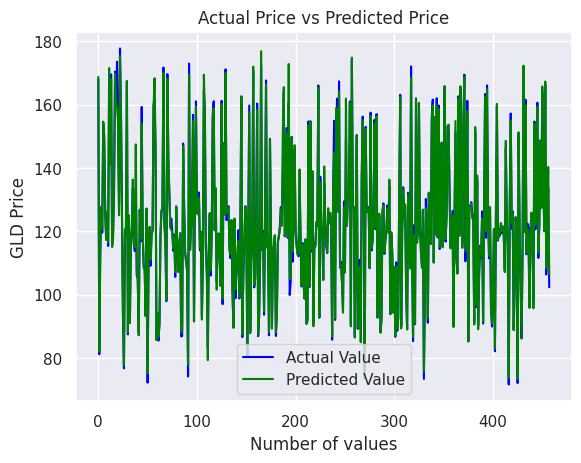

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [20]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
plt

## Predictive Model System

In [21]:
import numpy as np

# Load your trained model
model = regressor  # your trained RandomForestRegressor

# Taking input from the user
print("Please enter the following market index values to predict Gold Price:")

spx = float(input("SPX Index Value (e.g., 1200.56): "))
uso = float(input("USO (United States Oil Fund) Price (e.g., 45.67): "))
slv = float(input("SLV (Silver Trust) Price (e.g., 16.78): "))
eur_usd = float(input("EUR/USD Exchange Rate (e.g., 1.12): "))

input_data = (spx, uso, slv, eur_usd)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array for a single instance prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predicting the gold price
prediction = model.predict(input_data_reshaped)
predicted_gold_price = round(prediction[0], 2)

print(f"\nThe Predicted Gold Price (GLD) is: ₹ {predicted_gold_price} per gram (approx)")


Please enter the following market index values to predict Gold Price:
SPX Index Value (e.g., 1200.56): 1390.189941
USO (United States Oil Fund) Price (e.g., 45.67): 76.059998
SLV (Silver Trust) Price (e.g., 16.78): 15.590
EUR/USD Exchange Rate (e.g., 1.12): 1.557099

The Predicted Gold Price (GLD) is: ₹ 86.48 per gram (approx)
